In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro, levene


In [16]:
train = pd.read_csv("/Users/abhishekwaghchaure/Desktop/Datasets/titanic/train.csv")
test = pd.read_csv("/Users/abhishekwaghchaure/Desktop/Datasets/titanic/test.csv")

In [17]:
df = pd.concat([train,test]).sample(1309)

In [18]:
population_male = df[df['Sex'] == 'male']['Age'].dropna()
population_female = df[df['Sex'] == 'female']['Age'].dropna()

In [19]:
df[df['Sex'] == 'female']['Age']

774    54.0
19      NaN
882    22.0
564     NaN
4      22.0
       ... 
141    22.0
264     NaN
77     55.0
92     27.0
49     36.0
Name: Age, Length: 466, dtype: float64

### Average age of male is significantly greater than avg age of females
* Single tail independent 2 sample t test

In [20]:
sample_male = population_male.sample(25)
sample_female = population_female.sample(25)
alpha = 0.05

In [21]:
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print(f"Shapiro Wilk Test for testing the normality of sample males : {shapiro_male}")
print(f"Shapiro Wilk Test for testing the normality of sample females : {shapiro_female}")

Shapiro Wilk Test for testing the normality of sample males : ShapiroResult(statistic=0.9738389550547893, pvalue=0.7427843893249393)
Shapiro Wilk Test for testing the normality of sample females : ShapiroResult(statistic=0.9460377520633886, pvalue=0.20380543617000202)


<Axes: ylabel='Count'>

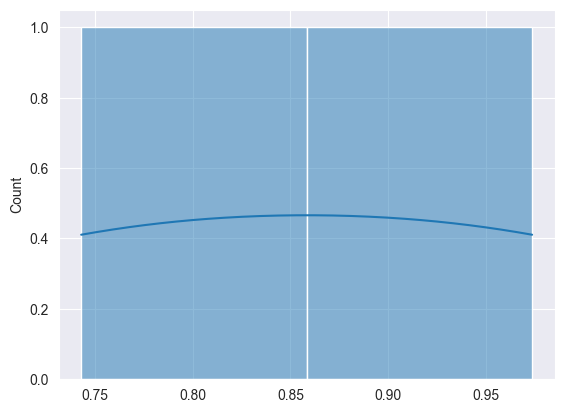

In [22]:
sns.histplot(shapiro_male, kde = True)

#### As P value > alpha (0.05) ---> Normality check pass

In [23]:
levene_test = levene(sample_female, sample_male)
print(f'Levene Test : {levene_test}')

Levene Test : LeveneResult(statistic=0.0932992847511534, pvalue=0.761344693002827)


In [24]:
print(f"population_female mean is : {population_female.mean()}")
print(f"Population male mean : {population_male.mean()}")

population_female mean is : 28.68708762886598
Population male mean : 30.58522796352584


#### As p value > alpha 0.05 -----> the variance of two samples is similar

In [25]:
t_statistics, p_value = stats.ttest_ind(sample_male,sample_female)
print(f"T- statistics : {t_statistics}")
print(f"P vlaue : {p_value/2}")

T- statistics : -0.8320867001604497
P vlaue : 0.20474036393024841


## As p value < alpha (0.05) so we reject numll hypothesis